# Enterprise Risk Analysis: Exploring the Aircraft Leasing Industry

## Project Goal
Our project aim is to determine how to avoid potential risks associated with operating an aircraft leasing business.

## Business Problem
Flatiron Investing is expanding into new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. Flatiron Investing needs help determining which aircrafts are the lowest risk to start their new business endeavor.

## Data Source and Data Exploration

Our data is from the [National Transportation Safety Board (NTSB)](https://www.ntsb.gov/Pages/AviationQuery.aspx) dataset of aviation accidents. Each row in the dataset represents an aircraft accident. The types of flights included are non-military and non-state flights, collectively called "civil aviation,"which includes both private and commercial.

## Import Packages and Read in Data

In [304]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.api.types as ptypes

#Hides warnings
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [305]:
df = pd.read_csv("project_data/Aviation_Data.csv", delimiter=",")

/Users/claire/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Initial Data Exploration

In [306]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [307]:
# In our initial look at the data, there are extra rows with only Investigation.Type we need to remove.
# We also noted that there are significant missing values for Event.Id
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### Convert Event.Date to Date Type

In [308]:
# Coerce 'Event.Date' into pandas date time object
df["Event.Date"] = pd.to_datetime(df['Event.Date'], format='%Y-%m-%d', errors = 'coerce')
# Assert that Event.Date is not a datetime64 dtype:
assert ptypes.is_datetime64_any_dtype(df['Event.Date'])

### Clean Event.Id Column
#### This removes nulls from `Event.Id`, `Investigation.Type`, `Accident.Number`, and `Event.Date`.

In [309]:
# Drop rows where 'Event.Id' is NULL
df_clean = df.dropna(subset=['Event.Id'])


In [310]:
# Drop duplicates using the Event.Id column
df_clean1 = df_clean.drop_duplicates(subset=['Event.Id'])


In [311]:
# After dropping rows where NOT Event.Id null,
# We now have a dataset where first 4 columns have no nulls
# We think this makes sense because without an id or accident number, the event wasn't properly documented
df_clean1.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     222
Latitude                  53739
Longitude                 53748
Airport.Code              38350
Airport.Name              35834
Injury.Severity             990
Aircraft.damage            3103
Aircraft.Category         55770
Registration.Number        1285
Make                         63
Model                        92
Amateur.Built               100
Number.of.Engines          6027
Engine.Type                7024
FAR.Description           56036
Schedule                  75591
Purpose.of.flight          6122
Air.carrier               71418
Total.Fatal.Injuries      11267
Total.Serious.Injuries    12322
Total.Minor.Injuries      11760
Total.Uninjured            5863
Weather.Condition          4473
Broad.phase.of.flight     27114
Report.Status              6361
Publication.Date          15057
dtype: i

### Subset based on Event.Date
- We wanted to only look at past 30 years because planes older than that likely no longer flying

In [312]:
# Subset data to look at past 30 years of data:
df_30 = df_clean1[df_clean1['Event.Date'] >= '1993-01-01']

In [313]:
# Check Date Range
print(df_30['Event.Date'].min())
print(df_30['Event.Date'].max())


1993-01-01 00:00:00
2022-12-29 00:00:00


### Create Total Injuries Column

In [314]:
df_30['Total.Fatal.Injuries'].fillna(0.0, inplace=True)
df_30['Total.Minor.Injuries'].fillna(0.0, inplace=True)
df_30['Total.Serious.Injuries'].fillna(0.0, inplace=True)

In [315]:
# Create Total Injuries Column
df_30['Total.Injuries'] = df_30['Total.Fatal.Injuries'] + df_30['Total.Minor.Injuries'] + df_30['Total.Serious.Injuries'] 
# Sanity Check new 'Total.Injuries' Column:
df_30[['Total.Injuries', 'Total.Fatal.Injuries', 'Total.Minor.Injuries', 'Total.Serious.Injuries']].head()

,Total.Injuries,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries
32026,2.0,1.0,1.0,0.0
32027,1.0,0.0,0.0,1.0
32028,1.0,0.0,1.0,0.0
32029,1.0,0.0,1.0,0.0
32030,0.0,0.0,0.0,0.0


### Clean Make and Model Columns

In [316]:
#Cleaning the Make column (this gets rid of a lot of unique values)
#Start by making everything lowercase
df_30['Make'] = df_30['Make'].str.lower()
#capitalize the beginning of each word
df_30['Make'] = df_30['Make'].str.title()
#Get rid of whitespace
df_30['Make'] = df_30['Make'].str.strip()

In [317]:
#Cleaning the Model column (I don’t think this got rid of any unique values)
#Start by making everything uppercase
df_30['Model'] = df_30['Model'].str.upper()
#Get rid of whitespace
df_30['Model'] = df_30['Model'].str.strip()

In [318]:
df_30['Model']

32026            8A
32027          269C
32028           152
32029    PA-32R-301
32030           120
            ...    
90343     PA-28-151
90344          7ECA
90345         8GCBC
90346          210N
90347     PA-24-260
Name: Model, Length: 56405, dtype: object

### Clean Aircraft.Category Column:
- Here we will throw out only those Aircraft.Category rows where Airplane or NULL
- Concatenate Make and Model = Make_Model
- Keep the rows that are (Aircraft.Category = NULL) ONLY IF...
- The Make_Model value is one that exists in rows that are (Aircraft.Category = 'Airplane')

In [319]:
#Get rid of non airplane rows but keep the nulls
#First fill nulls with ‘n/a’
df_30['Aircraft.Category'].fillna('n/a', inplace=True)
#Keep only rows with ‘Airplane’ or ‘n/a’
df_clean2 = df_30.loc[(df_30['Aircraft.Category'] == 'Airplane') | (df_30['Aircraft.Category'] == 'n/a')]


In [320]:
# Preview value counts
df_clean2['Aircraft.Category'].value_counts()

n/a         27840
Airplane    24294
Name: Aircraft.Category, dtype: int64

In [321]:
# Create concatenated Make.Model column:
df_clean2["Make.Model"] = df_clean2['Make'].astype(str) +"_"+ df_clean2["Model"]

In [322]:
# Preview concatenated column:
df_clean2["Make.Model"].head()

32026         Luscombe_8A
32027         Hughes_269C
32028          Cessna_152
32029    Piper_PA-32R-301
32030          Cessna_120
Name: Make.Model, dtype: object

In [323]:
# Preview counts for each Make.Model, grouped on Aircraft.Category:
df_clean2.groupby(['Aircraft.Category','Make.Model']).size()


Aircraft.Category  Make.Model                 
Airplane           177Mf Llc_PITTS MODEL 12       1
                   2007 Savage Air Llc_EPIC LT    1
                   2021Fx3 Llc_CCX-2000           2
                   3Xtrim_450 ULTRA               1
                   5 Rivers Llc_SQ-2              1
                                                 ..
n/a                nan_RV-4                       1
                   nan_SUPER QUICKIE 2            1
                   nan_TERATORN                   1
                   nan_UNKNOWN                    1
                   nan_VANS RV-6                  1
Length: 14186, dtype: int64

### Split into two dataframes:

In [324]:
# Isolate a dataframe only containing rows where category is Airplane:
df_plane = df_clean2[df_clean2['Aircraft.Category'] == 'Airplane']
# And one for category = n/a:
df_na = df_clean2[df_clean2['Aircraft.Category'] == 'n/a']

### Explore results:

In [325]:
# Category = Airplane

# 27,520 rows
# 7,484 unique Make.Model values
print(df_plane.shape)
print(df_plane['Make.Model'].unique().shape)
df_plane['Make.Model'].tail()

(24294, 33)
(7037,)


90328                          Piper_PA42
90332             Cirrus Design Corp_SR22
90335                  Swearingen_SA226TC
90336                        Cessna_R172K
90345    American Champion Aircraft_8GCBC
Name: Make.Model, dtype: object

In [326]:
# Category = n/a

# 55,770 rows
# 11,038 unique Make.Model values
print(df_na.shape)
print(df_na['Make.Model'].unique().shape)
df_na['Make.Model'].tail()

(27840, 33)
(7151,)


90342    Air Tractor_AT502
90343      Piper_PA-28-151
90344        Bellanca_7ECA
90346          Cessna_210N
90347      Piper_PA-24-260
Name: Make.Model, dtype: object

### Filter the **category = n/a** rows to only contain the Make.Model values of Airplanes

In [327]:
# Get a list of all of the unique values of "Make.Model" where aircraft.category = 'Aiplane':
airplane_make_model_list = list(df_plane['Make.Model'].unique())

In [328]:
# Go back to original dataframe "df_clean2" before we split it, and filter to only Make.Model values in airplane_make_model_list
df_ap_mm = df_clean2[df_clean2['Make.Model'].isin(airplane_make_model_list)]

In [329]:
# Sanity Check:
# Number of rows where 'Aircraft.Category' = 'Airplane' vs. Total Rows
print(df_ap_mm['Aircraft.Category'].value_counts())
print(df_ap_mm.shape)

Airplane    24294
n/a         19043
Name: Aircraft.Category, dtype: int64
(43337, 33)


### Now we only have Make.Model rows that we know are Airplanes, so we can replace all 'n/a' values with 'Airplane'

In [330]:
# Fill 'n/a' value with 'Airplane':
df_ap_mm['Aircraft.Category'] = df_ap_mm['Aircraft.Category'].replace(['n/a'], 'Airplane')


## Analyze Purpose of Flight and Aircraft Make

### Flight Purpose - Top 5 highest Number of Accidents

In [331]:
# Preview incident count for Purpose of Flight:
df_ap_mm['Purpose.of.flight'].value_counts()

Personal                     25208
Instructional                 5404
Aerial Application            2036
Unknown                       1776
Business                      1304
Positioning                    755
Other Work Use                 357
Ferry                          274
Flight Test                    268
Aerial Observation             262
Public Aircraft                202
Executive/corporate            201
Skydiving                      162
Banner Tow                      99
Air Race show                   74
Public Aircraft - Federal       65
Glider Tow                      39
Public Aircraft - State         29
Firefighting                    20
Air Race/show                   16
Public Aircraft - Local         12
Air Drop                         5
ASHO                             5
PUBS                             3
External Load                    1
Name: Purpose.of.flight, dtype: int64

<ipython-input-332-1b304ae79058>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(flight_purpose,fontsize=12);


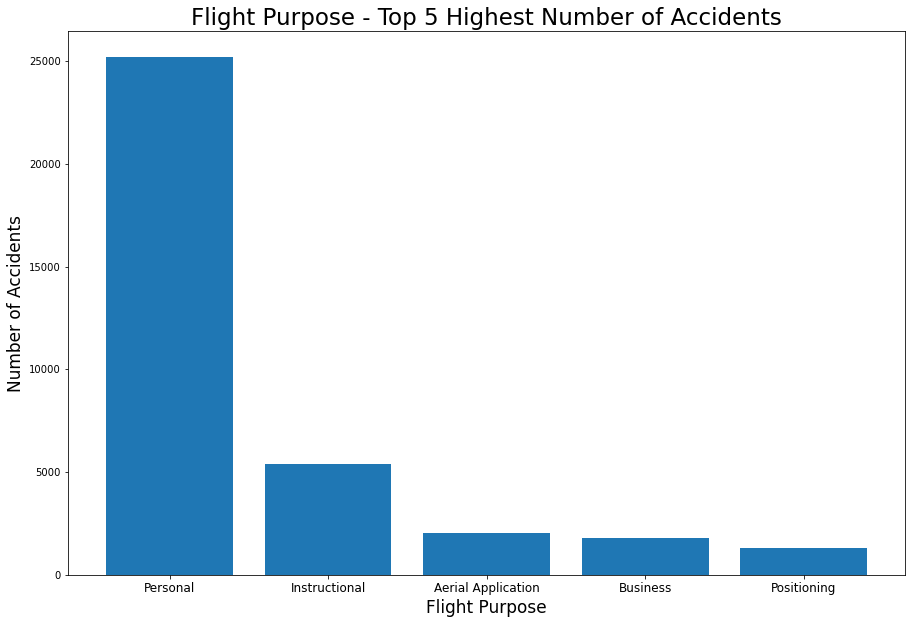

In [332]:
# Top 5 Purposes of flight that had a crash in the last 30 years:

# Create lists for flight purpose and incident counts:
flight_purpose = list(df_ap_mm['Purpose.of.flight'].value_counts()[0:6].index)
flight_purpose.remove('Unknown') # Removed "Unknown" values from Purpose of Flight
purpose_counts = list(df_ap_mm['Purpose.of.flight'].value_counts()[0:5].values)


bar_chart_title = 'Flight Purpose - Top 5 Highest Number of Accidents'
bar_chart_count_label = 'Flight Purpose'
bar_chart_series_label = 'Number of Accidents'

fig, ax= plt.subplots(figsize=(15, 10))
ax.bar(x=flight_purpose, height=purpose_counts)

ax.set_title(bar_chart_title, fontsize=23)
ax.set_xlabel(bar_chart_count_label, fontsize=17)
ax.set_ylabel(bar_chart_series_label, fontsize=17)
ax.set_xticklabels(flight_purpose,fontsize=12);



### Aircraft Make - Top 5 Highest Number of Accidents

In [333]:
# See all values of Make and Model for our airplanes
# Here we can observe that Cessna, Piper, Beech, Boing and Mooney planes...
# ...are associated with the highest number of accidents
df_ap_mm['Make'].value_counts()

Cessna                15311
Piper                  8427
Beech                  2968
Boeing                 1820
Mooney                  777
                      ...  
Ntbk                      1
Davis Benny               1
Mccrary Bobby C Jr        1
Eggleston Daniel          1
North Wing Uum Inc        1
Name: Make, Length: 3428, dtype: int64

<ipython-input-334-673fe6c6fd6d>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(airplane_makes,fontsize=12);


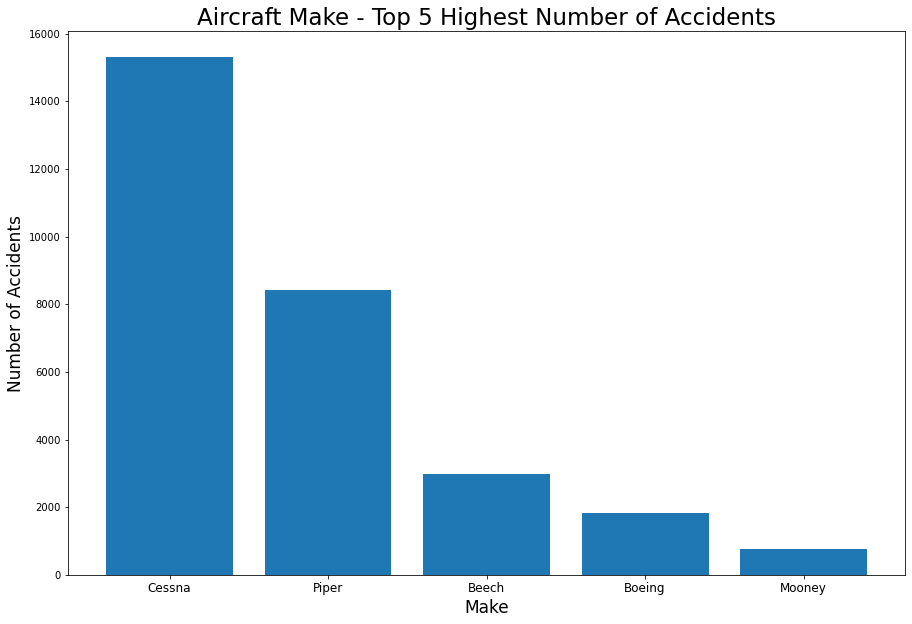

In [334]:
# Top 10 makes of airplanes that had a crash in the last 30 years:

airplane_makes = list(df_ap_mm['Make'].value_counts()[0:5].index)
accident_counts = list(df_ap_mm['Make'].value_counts()[0:5].values)


bar_chart_title = 'Aircraft Make - Top 5 Highest Number of Accidents'
bar_chart_count_label = 'Make'
bar_chart_series_label = 'Number of Accidents'

fig, ax= plt.subplots(figsize=(15, 10))

ax.set_title(bar_chart_title, fontsize=23)

ax.bar(x=airplane_makes, height=accident_counts)

ax.set_xlabel(bar_chart_count_label, fontsize=17)

ax.set_ylabel(bar_chart_series_label, fontsize=17)

ax.set_xticklabels(airplane_makes,fontsize=12);

## Clean Make and Model Data
The Make and Model columns need to be cleaned to draw conclusions from the data.

In [335]:
#List of Aircraft Manufacturers used to clean data 
major_manufacturers=['Cessna',
'Piper',
'Beech',
'Boeing',
'Mooney',
'Bellanca',
'Air Tractor',
'Grumman',
'Maule',
'Aeronca',
'Champion',
'Mcdonnell Douglas',
'Airbus',
'Stinson',
'Luscombe',
'Cirrus',
'Aero Commander',
'Taylorcraft',
'North American',
'De Havilland',
'Embraer',
'Cirrus',
'Aviat',
'Ayres',
'Rockwell',
'Grumman',
'Socata',
'Dehavilland',
'Learjet',
'Aviat',
'Diamond Aircraft',
'Ercoupe',
'Bombardier',
]

#Filling null values
df_30['Make'].fillna('n/a', inplace=True)
#cleaning Make data and populating new column Make.Clean
#e.g. The Boeing Aircraft Company, Boeing inc and boeing all become Boeing in Make.Clean
for manufacturer in major_manufacturers:
    df_30.loc[df_30['Make'].str.contains(manufacturer, case=False), 'Make.Clean'] = manufacturer
#De Havilland is in the data as De Havilland and Dehavilland so it needs a special case
df_30.loc[df_30['Make'].str.contains('Dehavilland', case=False), 'Make.Clean'] = 'De Havilland'

### Cleaning Model Data
Below are groups of the most popular aircraft models for Boeing, Airbus and Cessna. These were created using data from the companies websites. For example, Airbus considers its A319, A320 and A321 airliners to be variants in the A320 family so they are grouped together as the A320.

In [336]:
#Aircraft model groups
boeing_aircraft_models = {'707':['707'],'717':['717'],'727':['727'],'737':['737'],'747':['747'],'757':['757'],
                          '767':['767'],'777':['777'],'787':['787'],'Model 75':
                          ['A75','A 75','A-75','B75','B 75','B-75','D75','D 75','D-75','E75','E 75','E-75','PT 17','PT-17','PT17']}
airbus_aircraft_models = {'A220':['220','BD50'],'A300':['300','F462'],'A310':['310'],'A320':['319','320','321'],
                          'A330':['330'],'A340':['340'],'A350':['350'],'A380':['380']}
cessna_aircraft_models = ['152','172','150','180','182','140','170','188','185','177','210']
#Filling null values in Model data
df_30['Model'].fillna('n/a', inplace=True)

#### Boeing 

In [337]:
#First creating a new data frame with just Boeing data
boeing_data = pd.DataFrame(df_30.loc[df_30['Make.Clean']=='Boeing'])
#Taking model data with variant information, grouping it by family and saving it in new column called Model.Clean
#e.g. 737-200, B737-800 and 737-3B7 are all stored as 737

#Looping through the boeing_aircraft_models dictionary
for model in boeing_aircraft_models:
    #Looping through individual dictionary entrys which are lists of variants that make up each aircraft model
    for variant in boeing_aircraft_models[model]:
        boeing_data.loc[boeing_data['Model'].str.contains(variant, case=False), 'Model.Clean'] = model
        
boeing_data['Model.Clean'].value_counts()

737         917
Model 75    247
747         233
767         185
757         174
777         158
727          93
787          41
717          23
707          15
Name: Model.Clean, dtype: int64

#### Airbus

In [338]:
#First creating a new data frame with just Airbus data
airbus_data = pd.DataFrame(df_30.loc[df_30['Make.Clean']=='Airbus'])

In [339]:
#removeing dashes and white space then saving the first four characters 
airbus_data['Model'] = airbus_data['Model'].str.replace('-','')
airbus_data['Model'] = airbus_data['Model'].str.replace(' ','')
airbus_data['Model'] = airbus_data['Model'].str[:4]


In [340]:
#Looping through the airbus_aircraft_models dictionary
for model in airbus_aircraft_models:
    #Looping through individual dictionary entrys which are lists of variants that make up each aircraft model
    for variant in airbus_aircraft_models[model]:
        airbus_data.loc[airbus_data['Model'].str.contains(variant, case=False), 'Model.Clean'] = model
#Merging the Airbus_data back into the main data frame
df_30['Model'].fillna('n/a', inplace=True)

#### Cessna

In [341]:
#Taking model data with variant information, grouping it by family and saving it in new column called Model.Clean
for model in cessna_aircraft_models:
    df_30.loc[df_30['Model'].str.contains(model, case=False), 'Model.Clean'] = model
df_30['Model.Clean'].fillna('n/a', inplace=True)

### Combining Data Frames

In [342]:
combined_data = airbus_data.merge(boeing_data, how = 'outer')

## Exploring Boeing Accidents

In [343]:
combined_data['Purpose.of.flight'].value_counts()

Unknown                      401
Personal                     211
Positioning                   17
Instructional                 14
Other Work Use                12
Business                      11
Ferry                          6
Flight Test                    6
Air Race show                  5
Public Aircraft                4
Aerial Application             3
Public Aircraft - Federal      3
Air Race/show                  3
Public Aircraft - Local        1
Air Drop                       1
Aerial Observation             1
External Load                  1
Public Aircraft - State        1
Skydiving                      1
Name: Purpose.of.flight, dtype: int64

In [344]:
combined_data['Purpose.of.flight'].isna().sum()

1904

In [345]:
#There is already an 'Uknown' category so adding the nulls to this
combined_data['Purpose.of.flight'].fillna('Unknown', inplace=True)

In [346]:
#Sanity check
combined_data['Purpose.of.flight'].value_counts()

Unknown                      2305
Personal                      211
Positioning                    17
Instructional                  14
Other Work Use                 12
Business                       11
Ferry                           6
Flight Test                     6
Air Race show                   5
Public Aircraft                 4
Aerial Application              3
Public Aircraft - Federal       3
Air Race/show                   3
Public Aircraft - Local         1
Air Drop                        1
Aerial Observation              1
External Load                   1
Public Aircraft - State         1
Skydiving                       1
Name: Purpose.of.flight, dtype: int64

In [347]:
#Getting rid of the 'Uknown' values because these don't add value to us
combined_data = combined_data[combined_data['Purpose.of.flight'] != 'Unknown']

In [348]:
#Sanity check
combined_data['Purpose.of.flight'].value_counts()

Personal                     211
Positioning                   17
Instructional                 14
Other Work Use                12
Business                      11
Ferry                          6
Flight Test                    6
Air Race show                  5
Public Aircraft                4
Air Race/show                  3
Public Aircraft - Federal      3
Aerial Application             3
Public Aircraft - State        1
Aerial Observation             1
External Load                  1
Air Drop                       1
Skydiving                      1
Public Aircraft - Local        1
Name: Purpose.of.flight, dtype: int64

In [349]:
#Create new DataFrame for only Boeing planes
Boeing_Purpose = combined_data[combined_data['Make'] == 'Boeing']

In [350]:
#Create a list of the top 5 purposes of flights
Purpose_Frequencies = Boeing_Purpose['Purpose.of.flight'].value_counts()
Top_Purposes = list(Purpose_Frequencies.index[0:5])
Top_Purposes

['Personal', 'Positioning', 'Instructional', 'Business', 'Ferry']

In [351]:
#Create a list of the counts of the top 5 purposes of flights
Top_Purpose_Counts = list(Purpose_Frequencies.values[0:5])
Top_Purpose_Counts

[168, 13, 11, 8, 6]

<ipython-input-352-8771d0d78eb7>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=45);


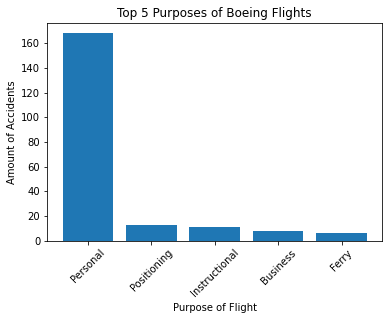

In [352]:
#Create bar chart that shows purposes of flights for only Boeing planes
fig, ax = plt.subplots()

x = Top_Purposes
y = Top_Purpose_Counts

ax.bar(x, y)
ax.set_title('Top 5 Purposes of Boeing Flights')
ax.set_ylabel('Amount of Accidents')
ax.set_xlabel('Purpose of Flight')
ax.set_xticklabels(x, rotation=45);

## Results and Reccommendations
- Our recommendations stem from slicing the `Purpose.of.flight` column by cleaned `Make` and `Model` columns. 

### We recommend investing in aircraft for commercial leasing over private leasing to individuals:
- We grouped our dataset by `Purpose.of.flight` and found that most incidents involved flights flown for personal purposes. 
- We define "commercial" as any `Purpose.of.flight` NOT in the personal category. 
- We then investigated the `Make` of the aircraft involved in the most incidents. 
- We found that of these top 5, most are single engine planes traditionally used for recreation and other personal purposes, such as Cessna and Piper. 
- This reinforces our inclination that private flying is riskier than commercial. 
- The exception to this rule is Boeing, the fourth riskiest `Make`.

 ### Out of large commercial aircraft, we recommend the Airbus A350 and the Airbus A220:
- The largest commercial passenger aircraft manufacturers by a longshot are Boeing and Airbus.
- Among these, we found that Airbus aircraft were involved in fewer incidents over the past 30 years. 
- Among the Airbus aircraft still in production, the A350 was the safest -- having suffered no incidents to date. 
- The A350 is a long-range/wide-body aircraft. Airlines considering leasing our aircraft are likely operating both the long-range/wide-body types of aircraft as well as the short-range/narrow-body types.
- We found that the Airbus A220 was the safest short-range/narrow-body type.

### Instructional flights were associated with relatively high incident rates. However, if large-bodied commercial aircraft are used the risk can be avoided:
- When examining the commercial and personal `Purpose.of.flight` data, instructional businesses appear to have a high level of risk.
- However, when we isolate commercial aircraft, our results show that instructional businesses should still be considered as a safe and viable option as long as only larger commercial airplanes are used. 
- This means an instructional business could be a viable option if the purpose is to train commercial pilots.

- Converted `Event.Date` to `pd.to_datetime` format.
- Removed null values from `Event.Id`, `Investigation.Type`, `Accident.Number`, and `Event.Date`.
- Subset data by `Event.Date` to past 30 years because older planes are likely no longer in the air.
- Created `Total.Injuries` column by summing `Total.Fatal.Injuries`, `Total.Minor.Injuries`, and `Total.Serious.Injuries`